# Imports

In [1]:
import cv2
import scipy as sp
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import statistics as stat
from scipy.interpolate import splprep, splev

# Load images

In [2]:
def load_images(pack = plt):
    path = "./data"

    first_brush_left_list = []
    first_brush_right_list = []
    second_brush_left_list = []
    second_brush_right_list = []

    for i in range(1,149):
        file_location_1_left = path + "/" + str(i) + "/" + "FirstBrushOK1L.png"
        file_location_1_right = path + "/" + str(i) + "/" + "FirstBrushOK1R.png"
        file_location_2_left = path + "/" + str(i) + "/" + "SecondBrushOK1L.png"
        file_location_2_right = path + "/" + str(i) + "/" + "SecondBrushOK1R.png"
        if pack == 'cv2':
            current_image_1_left = cv2.imread(file_location_1_left)
            current_image_1_right = cv2.imread(file_location_1_right)
            current_image_2_left = cv2.imread(file_location_2_left)
            current_image_2_right = cv2.imread(file_location_2_right)
        else:
            current_image_1_left = plt.imread(file_location_1_left)
            current_image_1_right = plt.imread(file_location_1_right)
            current_image_2_left = plt.imread(file_location_2_left)
            current_image_2_right = plt.imread(file_location_2_right)
        first_brush_left_list.append(current_image_1_left)
        first_brush_right_list.append(current_image_1_right)
        second_brush_left_list.append(current_image_2_left)
        second_brush_right_list.append(current_image_2_right)
        
    return first_brush_left_list, first_brush_right_list, second_brush_left_list, second_brush_right_list

In [3]:
print("Image Data")
print("==========")
first_brush_left_list, first_brush_right_list, second_brush_left_list, second_brush_right_list= load_images()
image = first_brush_left_list[16]
first_brush_left_list_cv2, first_brush_right_list_cv2, second_brush_left_list_cv2, second_brush_right_list_cv2 = load_images('cv2')
image_cv2 = first_brush_left_list_cv2[16]
print("max:", np.max(image))
print("min:", np.min(image))
print("size:", image.shape[0], "x", image.shape[1])

Image Data
max: 1.0
min: 0.011764706
size: 235 x 2231


# Distance Calculations

In [4]:
def getXDistance(image):
    
    image_black = Image.fromarray(image*255).convert('RGBA')
    plt.subplot(111),plt.imshow(image_black)
    xlim,ylim = image_black.size
    x_vector = []
    for x in range(xlim):
        for y in range(ylim):
            px = image_black.getpixel((x,y))
            if px[0] > 70:
                image_black.putpixel((x,y),(255,255,255,255))
            else:
                image_black.putpixel((x,y),(0,0,0,255))
            if y == int(ylim/2) and image_black.getpixel((x,y)) == (0,0,0,255):
                x_vector.append(x)
    x_dist = np.diff(x_vector)

    distance = max(x_dist)
    return distance

In [5]:
# set parameters
ker_size = 3
th_bin = 30
max_val = 255
px_dist = 100
th_black = 130
normal_width_mm = 600

getXDistance(image)

344

# Show image

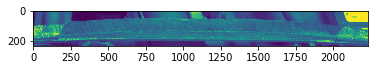

In [6]:
plt.imshow(image)
plt.show()

# Filtered Image

In [7]:
apt = 11

## Gauss

In [8]:
image_gauss = cv2.GaussianBlur(image_cv2, (apt, apt), 0)

## Median

In [9]:
image_median = cv2.medianBlur(image_cv2, apt)

# Gradient Filter (Sobel)

In [10]:
ker_size = 3
sobely_cv2 = cv2.Sobel(image_cv2,cv2.CV_8U,0,1,ksize=ker_size)
sobelx_cv2 = cv2.Sobel(image_cv2,cv2.CV_8U,1,0,ksize=ker_size)
#sobely_median = cv2.Sobel(image_median,cv2.CV_8U,0,1,ksize=ker_size)
#sobely_gauss = cv2.Sobel(image_gauss,cv2.CV_8U,0,1,ksize=ker_size)

# Clean Up

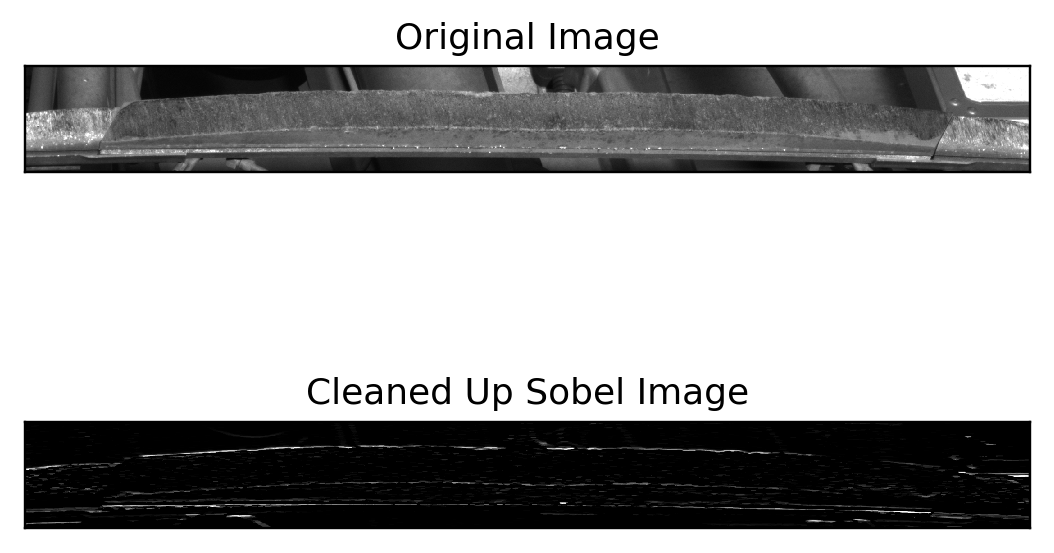

In [11]:
kernel_open_y = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,2))
opening_sobely = cv2.morphologyEx(sobely_cv2, cv2.MORPH_OPEN, kernel_open_y)

kernel_open_x = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,12))
opening_sobelx = cv2.morphologyEx(sobelx_cv2, cv2.MORPH_OPEN, kernel_open_x)

#kernel_dilation = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,3))
#dilation_open_sobel = cv2.dilate(opening_sobel,kernel_dilation,iterations = 2)

plt.subplot(211),plt.imshow(image_cv2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(opening_sobely,cmap = 'gray')
plt.title('Cleaned Up Sobel Image'), plt.xticks([]), plt.yticks([])

fig = plt.gcf()
dpi = fig.get_dpi()
fig.set_dpi(dpi*3)

plt.show()

# Color in original Image

C:\Program Files\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][6]=x[0][0]
  (i, m, i)))
C:\Program Files\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][9]=x[0][0]
  (i, m, i)))
C:\Program Files\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][14]=x[0][0]
  (i, m, i)))
C:\Program Files\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][10]=x[0][0]
  (i, m, i)))
C:\Program Files\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][28]=x[0][0]
  (i, m, i)))
C:\Program Files\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][5]=x[0][0]
  (i, m, i)))
C:\Program Files\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][52]=x[0][0]
  (i, m, i)))
C:\Program Files\Anacon

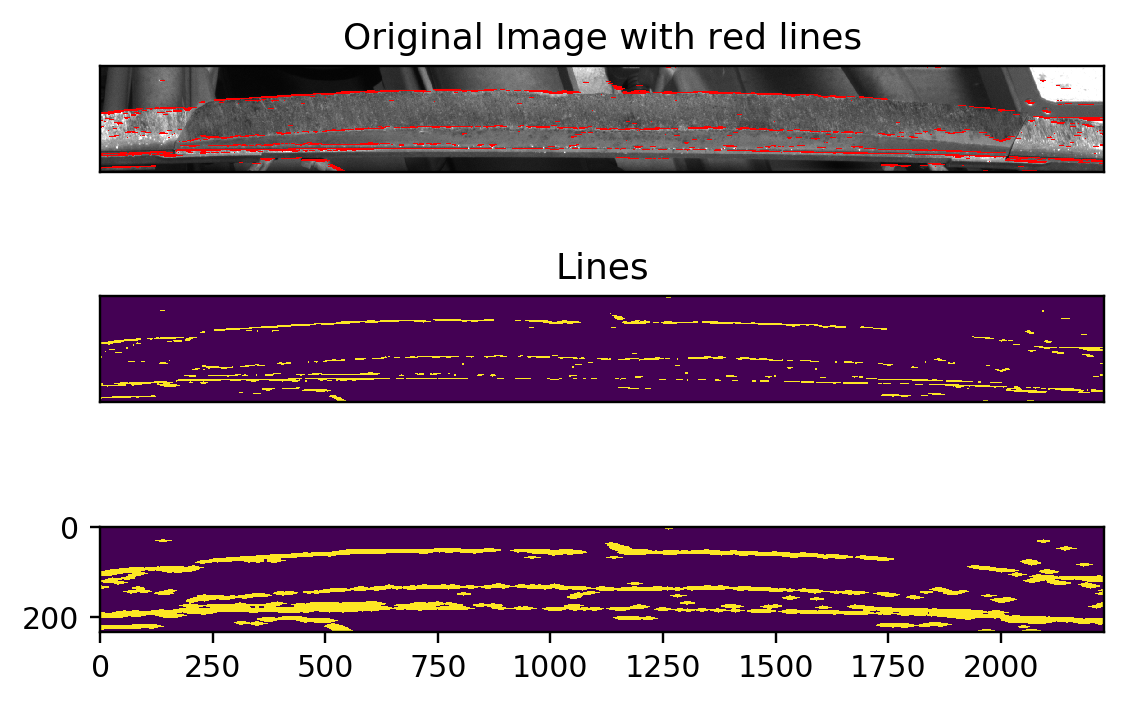

In [13]:
image_red = Image.fromarray(image*255).convert('RGBA')

xlim, ylim = image_red.size
th_bin = 30
ret, image_binary = cv2.threshold(opening_sobely, th_bin, 255, cv2.THRESH_TRUNC)

lines = np.zeros((ylim,xlim))

for x in range(xlim):
    for y in range(ylim):
        px = image_binary[y,x]
        if px[0] >= th_bin:
            image_red.putpixel((x,y), (255,0,0,255))
            lines[y,x] = 1

lines_img = np.array(lines * 255, dtype = np.uint8)
kernel_open= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,3))
open_lines = cv2.morphologyEx(lines_img, cv2.MORPH_OPEN, kernel_open)

_, contours, hierarchy = cv2.findContours(lines_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

smoothened = []
for contour in contours:
    x,y = contour.T
    # Convert from numpy arrays to normal arrays
    x = x.tolist()[0]
    y = y.tolist()[0]
    # https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.splprep.html
    tck, u = splprep([x,y], u=None,s=1.0, per=1)
    # https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linspace.html
    u_new = np.linspace(u.min(), u.max(), 25)
    # https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.splev.html
    x_new, y_new = splev(u_new, tck, der=0)
    # Convert it back to numpy format for opencv to be able to display it
    res_array = [[[int(i[0]), int(i[1])]] for i in zip(x_new,y_new)]
    smoothened.append(np.asarray(res_array, dtype=np.int32))

# Overlay the smoothed contours on the original image
cv2.drawContours(lines_img, smoothened, -1, (255,0,0), 2)

kernel_dilation = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,3))
dilation = cv2.dilate(open_lines, kernel_dilation, iterations = 3)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel_dilation)
            
plt.subplot(311),plt.imshow(image_red)
plt.title('Original Image with red lines'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(open_lines)
plt.title('Lines'), plt.xticks([]), plt.yticks([])
plt.subplot(313),plt.imshow(closing)

fig = plt.gcf()
dpi = fig.get_dpi()
fig.set_dpi(dpi*3)


In [ ]:
x_len, y_len = closing.shape
upper_line = [i for i, e in enumerate(closing) if e.max() == 1]




win_size = 100
num_win = int(y_len/win_size)
print(num_win)

#for i in range(num_win):
    

In [ ]:
gray_lines = cv2.cvtColor(lines,cv2.COLOR_BGR2GRAY)

hough_lines = cv2.HoughLines(gray_lines,1,np.pi/180,200)
for rho,theta in houg_lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(lines,(x1,y1),(x2,y2),(0,0,255),2)
            
